In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [3]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [4]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]

In [5]:
cut = 0
y1 = (Y <= cut) * 1
y2 = (Y > cut) * (-1) * (-Y)
Y2 = np.stack((y1, y2), axis=-1)

y1_val = (Y_val <= cut) * 1
y2_val = (Y_val > cut) * (-1) * (-Y_val)
Y2_val = np.stack((y1_val, y2_val), axis=-1)

In [6]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit5_nn import fit, comb_error

In [7]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc11 = nn.Linear(16, 24, bias = True)
        self.fc12 = nn.Linear(24, 1, bias = True)
        
        self.fc21 = nn.Linear(17, 24, bias=True)
        self.fc22 = nn.Linear(24, 5, bias=True)
        self.fc23 = nn.Linear(5, 1, bias=True)
                
    def forward(self, x):
        x1 = torch.tanh(self.fc11(x))
        x1 = torch.sigmoid(self.fc12(x1))
        x1 = self.fc12(x1)
        
        x2 = torch.cat((x1, x), 1)
        x2 = self.fc21(x2)
        x2 = F.relu(self.fc22(x2))
        
        x1 = torch.sigmoid(x1)
        x2 = torch.exp(self.fc23(x2))           
        x3 = torch.cat((x1, x2), 1)
        return x3

In [8]:
n_epochs = 5000
lr = 0.001
verbose = 1
n_batches = 6
batch_to_avg = 2
ep_to_check = 10
clipping = 0.20
sig2 = 950000
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining5.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
def m_error(output, target):
    return comb_error(output, target, sig2)

In [27]:
net = Net1()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining5.pt'
net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X=X2, X_val=X2_val, Y=Y2, Y_val=Y2_val, net=net, optimizer=optimizer, error=m_error, 
                n_epochs=n_epochs, n_batches=n_batches, batch_to_avg=batch_to_avg, 
                    ep_to_check=ep_to_check, clipping=clipping, PATH=PATH, device=device, 
                                            verbose=verbose, min_val_loss = float('inf'))

Epoch 1: Training Loss: 0.8360449075698853, Validation Loss: 0.9485837817192078
Epoch 2: Training Loss: 0.8360138436158498, Validation Loss: 0.9484882354736328
Epoch 3: Training Loss: 0.8359762529532114, Validation Loss: 0.9483674764633179
Epoch 4: Training Loss: 0.8359165191650391, Validation Loss: 0.9482219815254211
Epoch 5: Training Loss: 0.8358736534913381, Validation Loss: 0.9480242133140564
Epoch 6: Training Loss: 0.8357890248298645, Validation Loss: 0.9479126334190369
Epoch 7: Training Loss: 0.8357284367084503, Validation Loss: 0.9479485750198364
Epoch 8: Training Loss: 0.8356209794680277, Validation Loss: 0.9479002356529236
Epoch 9: Training Loss: 0.8355264266331991, Validation Loss: 0.9477781057357788
Epoch 10: Training Loss: 0.8354323208332062, Validation Loss: 0.9476484060287476
Epoch 11: Training Loss: 0.835336317618688, Validation Loss: 0.9475600123405457
New Checkpoint Saved into PATH
Epoch 12: Training Loss: 0.835216095050176, Validation Loss: 0.9473363161087036
Epoch 13

Epoch 100: Training Loss: 0.7928621272246043, Validation Loss: 0.8814045786857605
Epoch 101: Training Loss: 0.7927705446879069, Validation Loss: 0.8811280727386475
New Checkpoint Saved into PATH
Epoch 102: Training Loss: 0.7926705777645111, Validation Loss: 0.8810317516326904
Epoch 103: Training Loss: 0.7925783693790436, Validation Loss: 0.8809260129928589
Epoch 104: Training Loss: 0.7924785713354746, Validation Loss: 0.8807217478752136
Epoch 105: Training Loss: 0.7923848927021027, Validation Loss: 0.8805056214332581
Epoch 106: Training Loss: 0.7922937572002411, Validation Loss: 0.8803291320800781
Epoch 107: Training Loss: 0.7921985586484274, Validation Loss: 0.8801798820495605
Epoch 108: Training Loss: 0.7921083768208822, Validation Loss: 0.8800014853477478
Epoch 109: Training Loss: 0.792005310455958, Validation Loss: 0.8798354268074036
Epoch 110: Training Loss: 0.7919414242108663, Validation Loss: 0.8796330690383911
Epoch 111: Training Loss: 0.7918325712283453, Validation Loss: 0.879

Epoch 197: Training Loss: 0.7882562279701233, Validation Loss: 0.8706778287887573
Epoch 198: Training Loss: 0.7882455587387085, Validation Loss: 0.8704240322113037
Epoch 199: Training Loss: 0.7881732285022736, Validation Loss: 0.870344340801239
Epoch 200: Training Loss: 0.7881533106168112, Validation Loss: 0.870156466960907
Epoch 201: Training Loss: 0.78812904159228, Validation Loss: 0.8700937032699585
New Checkpoint Saved into PATH
Epoch 202: Training Loss: 0.7881046732266744, Validation Loss: 0.8699207305908203
Epoch 203: Training Loss: 0.788092166185379, Validation Loss: 0.8698697686195374
Epoch 204: Training Loss: 0.7880525390307108, Validation Loss: 0.8698800206184387
Epoch 205: Training Loss: 0.788025289773941, Validation Loss: 0.8698300123214722
Epoch 206: Training Loss: 0.7880005141099294, Validation Loss: 0.8697637319564819
Epoch 207: Training Loss: 0.7879870484272639, Validation Loss: 0.8698254823684692
Epoch 208: Training Loss: 0.7879618306954702, Validation Loss: 0.86964285

Epoch 294: Training Loss: 0.7864205837249756, Validation Loss: 0.8649449348449707
Epoch 295: Training Loss: 0.786413699388504, Validation Loss: 0.8647952675819397
Epoch 296: Training Loss: 0.786411186059316, Validation Loss: 0.8649789094924927
Epoch 297: Training Loss: 0.7863897482554117, Validation Loss: 0.865119218826294
Epoch 298: Training Loss: 0.7863915165265402, Validation Loss: 0.8650900721549988
Epoch 299: Training Loss: 0.7863625288009644, Validation Loss: 0.8649952411651611
Epoch 300: Training Loss: 0.7863529523213705, Validation Loss: 0.864980936050415
Epoch 301: Training Loss: 0.7863345096508662, Validation Loss: 0.8649118542671204
New Checkpoint Saved into PATH
Epoch 302: Training Loss: 0.786334216594696, Validation Loss: 0.8647242188453674
Epoch 303: Training Loss: 0.7863096296787262, Validation Loss: 0.8646711111068726
Epoch 304: Training Loss: 0.7862949271996816, Validation Loss: 0.8645020723342896
Epoch 305: Training Loss: 0.7862649857997894, Validation Loss: 0.8644539

Epoch 391: Training Loss: 0.7852120300134023, Validation Loss: 0.8612356185913086
New Checkpoint Saved into PATH
Epoch 392: Training Loss: 0.7852087120215098, Validation Loss: 0.8612020611763
Epoch 393: Training Loss: 0.7852036754290262, Validation Loss: 0.861243724822998
Epoch 394: Training Loss: 0.7851812144120535, Validation Loss: 0.8613184094429016
Epoch 395: Training Loss: 0.7851573725541433, Validation Loss: 0.8615004420280457
Epoch 396: Training Loss: 0.7851799229780833, Validation Loss: 0.8619548082351685
Epoch 397: Training Loss: 0.7851976255575815, Validation Loss: 0.8622115850448608
Epoch 398: Training Loss: 0.7852056423823038, Validation Loss: 0.8622033596038818
Epoch 399: Training Loss: 0.7852051556110382, Validation Loss: 0.862095832824707
Epoch 400: Training Loss: 0.7851642469565073, Validation Loss: 0.8616377115249634
Epoch 401: Training Loss: 0.7851253350575765, Validation Loss: 0.8611209988594055
New Checkpoint Saved into PATH
Epoch 402: Training Loss: 0.7851674159367

Epoch 488: Training Loss: 0.7842888434727987, Validation Loss: 0.8589698672294617
Epoch 489: Training Loss: 0.7842647830645243, Validation Loss: 0.8589284420013428
Epoch 490: Training Loss: 0.7842505077521006, Validation Loss: 0.8587607741355896
Epoch 491: Training Loss: 0.7842424710591634, Validation Loss: 0.8587045073509216
New Checkpoint Saved into PATH
Epoch 492: Training Loss: 0.7842602928479513, Validation Loss: 0.8585444688796997
Epoch 493: Training Loss: 0.7842472791671753, Validation Loss: 0.858663022518158
Epoch 494: Training Loss: 0.7842311064402262, Validation Loss: 0.8587854504585266
Epoch 495: Training Loss: 0.7842348515987396, Validation Loss: 0.8590776324272156
Epoch 496: Training Loss: 0.7842025458812714, Validation Loss: 0.8590936064720154
Epoch 497: Training Loss: 0.7842202683289846, Validation Loss: 0.8591185808181763
Epoch 498: Training Loss: 0.784187118212382, Validation Loss: 0.8590583205223083
Epoch 499: Training Loss: 0.7841740449269613, Validation Loss: 0.8589

Epoch 586: Training Loss: 0.7833672761917114, Validation Loss: 0.8566585183143616
Epoch 587: Training Loss: 0.78334841132164, Validation Loss: 0.8566080927848816
Epoch 588: Training Loss: 0.783330500125885, Validation Loss: 0.8564615845680237
Epoch 589: Training Loss: 0.7833376526832581, Validation Loss: 0.8563445210456848
Epoch 590: Training Loss: 0.7833297153313955, Validation Loss: 0.8564728498458862
Epoch 591: Training Loss: 0.7833061218261719, Validation Loss: 0.8566047549247742
New Checkpoint Saved into PATH
Epoch 592: Training Loss: 0.783371259768804, Validation Loss: 0.8570791482925415
Epoch 593: Training Loss: 0.7833200693130493, Validation Loss: 0.8570508360862732
Epoch 594: Training Loss: 0.7833171486854553, Validation Loss: 0.8569590449333191
Epoch 595: Training Loss: 0.78330331047376, Validation Loss: 0.8565476536750793
Epoch 596: Training Loss: 0.7832844356695811, Validation Loss: 0.8565956354141235
Epoch 597: Training Loss: 0.7832822650671005, Validation Loss: 0.85644340

Epoch 685: Training Loss: 0.7825658321380615, Validation Loss: 0.8548168540000916
Epoch 686: Training Loss: 0.7825595637162527, Validation Loss: 0.8549013137817383
Epoch 687: Training Loss: 0.782561461130778, Validation Loss: 0.854794442653656
Epoch 688: Training Loss: 0.7825489143530527, Validation Loss: 0.8550206422805786
Epoch 689: Training Loss: 0.7826015750567118, Validation Loss: 0.8554906845092773
Epoch 690: Training Loss: 0.782560388247172, Validation Loss: 0.855614960193634
Epoch 691: Training Loss: 0.7825731237729391, Validation Loss: 0.8552897572517395
Epoch 692: Training Loss: 0.7825354238351186, Validation Loss: 0.855171799659729
Epoch 693: Training Loss: 0.782527968287468, Validation Loss: 0.8549370765686035
Epoch 694: Training Loss: 0.7825175921122233, Validation Loss: 0.8548985123634338
Epoch 695: Training Loss: 0.7825090785821279, Validation Loss: 0.8547741174697876
Epoch 696: Training Loss: 0.7824976444244385, Validation Loss: 0.8547323346138
Epoch 697: Training Loss:

Epoch 783: Training Loss: 0.7819047570228577, Validation Loss: 0.8540768623352051
Epoch 784: Training Loss: 0.7818913161754608, Validation Loss: 0.8537025451660156
Epoch 785: Training Loss: 0.7819076975186666, Validation Loss: 0.853420078754425
Epoch 786: Training Loss: 0.7818587521711985, Validation Loss: 0.85328209400177
Epoch 787: Training Loss: 0.7818689048290253, Validation Loss: 0.8534047603607178
Epoch 788: Training Loss: 0.7818423509597778, Validation Loss: 0.8533378839492798
Epoch 789: Training Loss: 0.7818369170029958, Validation Loss: 0.8535398244857788
Epoch 790: Training Loss: 0.7818200091520945, Validation Loss: 0.8537094593048096
Epoch 791: Training Loss: 0.7818220853805542, Validation Loss: 0.8537746071815491
Epoch 792: Training Loss: 0.7818211615085602, Validation Loss: 0.8538368940353394
Epoch 793: Training Loss: 0.781816691160202, Validation Loss: 0.8536074757575989
Epoch 794: Training Loss: 0.7818080683549246, Validation Loss: 0.8536500930786133
Epoch 795: Training 

Epoch 881: Training Loss: 0.7812352279822031, Validation Loss: 0.8523973226547241
Epoch 882: Training Loss: 0.7812327742576599, Validation Loss: 0.8519995212554932
Epoch 883: Training Loss: 0.7812270025412241, Validation Loss: 0.8518388867378235
Epoch 884: Training Loss: 0.7812303404013315, Validation Loss: 0.8518206477165222
Epoch 885: Training Loss: 0.7812262972195944, Validation Loss: 0.8518653512001038
Epoch 886: Training Loss: 0.7812108794848124, Validation Loss: 0.8521238565444946
Epoch 887: Training Loss: 0.7812267045180002, Validation Loss: 0.8526015877723694
Epoch 888: Training Loss: 0.781197061141332, Validation Loss: 0.8526816964149475
Epoch 889: Training Loss: 0.7811919152736664, Validation Loss: 0.8526673316955566
Epoch 890: Training Loss: 0.7811842362085978, Validation Loss: 0.8525535464286804
Epoch 891: Training Loss: 0.7811834613482157, Validation Loss: 0.8523375988006592
New Checkpoint Saved into PATH
Epoch 892: Training Loss: 0.7812091112136841, Validation Loss: 0.851

Epoch 979: Training Loss: 0.7806532035271326, Validation Loss: 0.8519512414932251
Epoch 980: Training Loss: 0.7806444764137268, Validation Loss: 0.8518597483634949
Epoch 981: Training Loss: 0.7806443174680074, Validation Loss: 0.8517563343048096
Epoch 982: Training Loss: 0.7806258002916971, Validation Loss: 0.8516478538513184
Epoch 983: Training Loss: 0.7806273698806763, Validation Loss: 0.8515692353248596
Epoch 984: Training Loss: 0.7806230088075002, Validation Loss: 0.8517679572105408
Epoch 985: Training Loss: 0.7806307872136434, Validation Loss: 0.852007269859314
Epoch 986: Training Loss: 0.7806303203105927, Validation Loss: 0.8521183133125305
Epoch 987: Training Loss: 0.7806272357702255, Validation Loss: 0.8521530628204346
Epoch 988: Training Loss: 0.7806156178315481, Validation Loss: 0.8519704341888428
Epoch 989: Training Loss: 0.7806136906147003, Validation Loss: 0.8518295884132385
Epoch 990: Training Loss: 0.7805951535701752, Validation Loss: 0.8517411351203918
Epoch 991: Traini

Epoch 1077: Training Loss: 0.7800928751627604, Validation Loss: 0.851520836353302
Epoch 1078: Training Loss: 0.7800768117109934, Validation Loss: 0.8514635562896729
Epoch 1079: Training Loss: 0.7800610462824503, Validation Loss: 0.8512632250785828
Epoch 1080: Training Loss: 0.7800750335057577, Validation Loss: 0.8509426712989807
Epoch 1081: Training Loss: 0.7800377309322357, Validation Loss: 0.8508658409118652
Epoch 1082: Training Loss: 0.7800438106060028, Validation Loss: 0.8505051732063293
Epoch 1083: Training Loss: 0.7800212303797404, Validation Loss: 0.8503170013427734
Epoch 1084: Training Loss: 0.7800374229749044, Validation Loss: 0.8502246141433716
Epoch 1085: Training Loss: 0.7800025045871735, Validation Loss: 0.850560188293457
Epoch 1086: Training Loss: 0.7799849708875021, Validation Loss: 0.8508297204971313
Epoch 1087: Training Loss: 0.7800376911958059, Validation Loss: 0.8512348532676697
Epoch 1088: Training Loss: 0.7799995839595795, Validation Loss: 0.8510954976081848
Epoch 

Epoch 1176: Training Loss: 0.7794792652130127, Validation Loss: 0.8507941365242004
Epoch 1177: Training Loss: 0.7794698576132456, Validation Loss: 0.8508251309394836
Epoch 1178: Training Loss: 0.7795002162456512, Validation Loss: 0.8509277701377869
Epoch 1179: Training Loss: 0.7794991781314214, Validation Loss: 0.8508391976356506
Epoch 1180: Training Loss: 0.7795100708802541, Validation Loss: 0.8510294556617737
Epoch 1181: Training Loss: 0.7794985175132751, Validation Loss: 0.851129949092865
Epoch 1182: Training Loss: 0.7795218924681345, Validation Loss: 0.851344883441925
Epoch 1183: Training Loss: 0.779521236817042, Validation Loss: 0.8514931797981262
Epoch 1184: Training Loss: 0.7795199056466421, Validation Loss: 0.851195216178894
Epoch 1185: Training Loss: 0.779481420914332, Validation Loss: 0.8508001565933228
Epoch 1186: Training Loss: 0.779454509417216, Validation Loss: 0.8506121039390564
Epoch 1187: Training Loss: 0.7794305880864462, Validation Loss: 0.8508166074752808
Epoch 1188

Epoch 1274: Training Loss: 0.7789868513743082, Validation Loss: 0.8496571779251099
Epoch 1275: Training Loss: 0.7789586385091146, Validation Loss: 0.849470317363739
Epoch 1276: Training Loss: 0.7789546549320221, Validation Loss: 0.8494777083396912
Epoch 1277: Training Loss: 0.7789316177368164, Validation Loss: 0.8493714332580566
Epoch 1278: Training Loss: 0.7789438466231028, Validation Loss: 0.8492682576179504
Epoch 1279: Training Loss: 0.7789445320765177, Validation Loss: 0.8491713404655457
Epoch 1280: Training Loss: 0.7789359192053477, Validation Loss: 0.8491194248199463
Epoch 1281: Training Loss: 0.7789272467295328, Validation Loss: 0.8492137789726257
Epoch 1282: Training Loss: 0.7789049843947092, Validation Loss: 0.8495271801948547
Epoch 1283: Training Loss: 0.778919925292333, Validation Loss: 0.8500407934188843
Epoch 1284: Training Loss: 0.7789085706075033, Validation Loss: 0.8501754403114319
Epoch 1285: Training Loss: 0.7789328595002493, Validation Loss: 0.850328266620636
Epoch 1

Epoch 1373: Training Loss: 0.7784805496533712, Validation Loss: 0.8497399687767029
Epoch 1374: Training Loss: 0.7784661451975504, Validation Loss: 0.8496129512786865
Epoch 1375: Training Loss: 0.7784603039423624, Validation Loss: 0.849463939666748
Epoch 1376: Training Loss: 0.778445323308309, Validation Loss: 0.8493146896362305
Epoch 1377: Training Loss: 0.7784434656302134, Validation Loss: 0.8489567637443542
Epoch 1378: Training Loss: 0.7784239252408346, Validation Loss: 0.8489413261413574
Epoch 1379: Training Loss: 0.7784197330474854, Validation Loss: 0.8488839268684387
Epoch 1380: Training Loss: 0.7784387270609537, Validation Loss: 0.8489558696746826
Epoch 1381: Training Loss: 0.7784139712651571, Validation Loss: 0.8488945364952087
Epoch 1382: Training Loss: 0.7784328361352285, Validation Loss: 0.8485072255134583
Epoch 1383: Training Loss: 0.7784328361352285, Validation Loss: 0.8487101197242737
Epoch 1384: Training Loss: 0.7784144381682078, Validation Loss: 0.849050760269165
Epoch 1

Epoch 1472: Training Loss: 0.7779927651087443, Validation Loss: 0.8485389947891235
Epoch 1473: Training Loss: 0.7780414521694183, Validation Loss: 0.8486131429672241
Epoch 1474: Training Loss: 0.7779980699221293, Validation Loss: 0.8489110469818115
Epoch 1475: Training Loss: 0.7779727379480997, Validation Loss: 0.849035382270813
Epoch 1476: Training Loss: 0.7780006329218546, Validation Loss: 0.8494186401367188
Epoch 1477: Training Loss: 0.7779751916726431, Validation Loss: 0.8495039343833923
Epoch 1478: Training Loss: 0.7779742777347565, Validation Loss: 0.849538266658783
Epoch 1479: Training Loss: 0.7779562572638193, Validation Loss: 0.8494951128959656
Epoch 1480: Training Loss: 0.777963767449061, Validation Loss: 0.8496649861335754
Epoch 1481: Training Loss: 0.777968148390452, Validation Loss: 0.8494415879249573
Epoch 1482: Training Loss: 0.7779536445935568, Validation Loss: 0.8492783308029175
Epoch 1483: Training Loss: 0.7779545883337656, Validation Loss: 0.8490709066390991
Epoch 14

Epoch 1571: Training Loss: 0.7775720208883286, Validation Loss: 0.8491974472999573
Epoch 1572: Training Loss: 0.7775400876998901, Validation Loss: 0.8489965200424194
Epoch 1573: Training Loss: 0.7775690853595734, Validation Loss: 0.848486065864563
Epoch 1574: Training Loss: 0.7775138318538666, Validation Loss: 0.8482108116149902
Epoch 1575: Training Loss: 0.7776537636915842, Validation Loss: 0.8477113842964172
Epoch 1576: Training Loss: 0.7776229580243429, Validation Loss: 0.847539484500885
Epoch 1577: Training Loss: 0.7776449173688889, Validation Loss: 0.8480050563812256
Epoch 1578: Training Loss: 0.7775201201438904, Validation Loss: 0.8481629490852356
Epoch 1579: Training Loss: 0.777504434188207, Validation Loss: 0.8483213186264038
Epoch 1580: Training Loss: 0.777495821317037, Validation Loss: 0.8484156727790833
Epoch 1581: Training Loss: 0.7774944603443146, Validation Loss: 0.8486337065696716
New Checkpoint Saved into PATH
Epoch 1582: Training Loss: 0.777531623840332, Validation Los

Epoch 1670: Training Loss: 0.777099589506785, Validation Loss: 0.8487492203712463
Epoch 1671: Training Loss: 0.777092973391215, Validation Loss: 0.8486467003822327
Epoch 1672: Training Loss: 0.7770880162715912, Validation Loss: 0.8485236763954163
Epoch 1673: Training Loss: 0.7770840227603912, Validation Loss: 0.848512589931488
Epoch 1674: Training Loss: 0.7770715753237406, Validation Loss: 0.8486924767494202
Epoch 1675: Training Loss: 0.7770649095376333, Validation Loss: 0.8488752841949463
Epoch 1676: Training Loss: 0.777052973707517, Validation Loss: 0.8489538431167603
Epoch 1677: Training Loss: 0.7770624160766602, Validation Loss: 0.8490176796913147
Epoch 1678: Training Loss: 0.7770623366038004, Validation Loss: 0.8490601778030396
Epoch 1679: Training Loss: 0.7770629028479258, Validation Loss: 0.8490974307060242
Epoch 1680: Training Loss: 0.7770462731520335, Validation Loss: 0.8490521907806396
Epoch 1681: Training Loss: 0.7770546674728394, Validation Loss: 0.8488937616348267
Epoch 16

Epoch 1770: Training Loss: 0.7766648332277933, Validation Loss: 0.8496660590171814
Epoch 1771: Training Loss: 0.7766439517339071, Validation Loss: 0.8492072224617004
Epoch 1772: Training Loss: 0.7766242523988088, Validation Loss: 0.848900556564331
Epoch 1773: Training Loss: 0.7766163448492686, Validation Loss: 0.8487311005592346
Epoch 1774: Training Loss: 0.7766070067882538, Validation Loss: 0.8486818075180054
Epoch 1775: Training Loss: 0.776617189248403, Validation Loss: 0.8485897779464722
Epoch 1776: Training Loss: 0.776620626449585, Validation Loss: 0.8488094210624695
Epoch 1777: Training Loss: 0.7765951951344808, Validation Loss: 0.848672091960907
Epoch 1778: Training Loss: 0.7766161362330118, Validation Loss: 0.8489089608192444
Epoch 1779: Training Loss: 0.776582658290863, Validation Loss: 0.84888756275177
Epoch 1780: Training Loss: 0.7766147603591284, Validation Loss: 0.8490960597991943
Epoch 1781: Training Loss: 0.7765723566214243, Validation Loss: 0.8488472104072571
Epoch 1782:

Epoch 1870: Training Loss: 0.7762912809848785, Validation Loss: 0.8490954637527466
Epoch 1871: Training Loss: 0.7762677172819773, Validation Loss: 0.8488109707832336
Epoch 1872: Training Loss: 0.776257594426473, Validation Loss: 0.848723292350769
Epoch 1873: Training Loss: 0.7762404580911001, Validation Loss: 0.848598837852478
Epoch 1874: Training Loss: 0.7762364248434702, Validation Loss: 0.8486289381980896
Epoch 1875: Training Loss: 0.7762393256028494, Validation Loss: 0.8488350510597229
Epoch 1876: Training Loss: 0.776235302289327, Validation Loss: 0.8490384221076965
Epoch 1877: Training Loss: 0.776224821805954, Validation Loss: 0.8486601114273071
Epoch 1878: Training Loss: 0.7762361566225687, Validation Loss: 0.8484989404678345
Epoch 1879: Training Loss: 0.7762463639179865, Validation Loss: 0.8484641313552856
Epoch 1880: Training Loss: 0.7762320140997568, Validation Loss: 0.8486380577087402
Epoch 1881: Training Loss: 0.7761863768100739, Validation Loss: 0.8490092754364014
Epoch 188

Epoch 1970: Training Loss: 0.7758585810661316, Validation Loss: 0.8494638204574585
Epoch 1971: Training Loss: 0.7758689522743225, Validation Loss: 0.8497717380523682
Epoch 1972: Training Loss: 0.7758519947528839, Validation Loss: 0.8497808575630188
Epoch 1973: Training Loss: 0.7758553624153137, Validation Loss: 0.849598228931427
Epoch 1974: Training Loss: 0.7758492628733317, Validation Loss: 0.8496801853179932
Epoch 1975: Training Loss: 0.7758326331774393, Validation Loss: 0.8495347499847412
Epoch 1976: Training Loss: 0.7758277058601379, Validation Loss: 0.8491455316543579
Epoch 1977: Training Loss: 0.7758140762646993, Validation Loss: 0.8491257429122925
Epoch 1978: Training Loss: 0.775817463795344, Validation Loss: 0.8489559292793274
Epoch 1979: Training Loss: 0.7758233646551768, Validation Loss: 0.8490768074989319
Epoch 1980: Training Loss: 0.7758327921231588, Validation Loss: 0.8489105105400085
Epoch 1981: Training Loss: 0.7758022745450338, Validation Loss: 0.8488855957984924
Epoch 

Epoch 2069: Training Loss: 0.7754886249701182, Validation Loss: 0.849281907081604
Epoch 2070: Training Loss: 0.7755113045374552, Validation Loss: 0.8489521145820618
Epoch 2071: Training Loss: 0.7754864692687988, Validation Loss: 0.8488665223121643
Epoch 2072: Training Loss: 0.7754950026671091, Validation Loss: 0.8488805294036865
Epoch 2073: Training Loss: 0.7755304276943207, Validation Loss: 0.8486552834510803
Epoch 2074: Training Loss: 0.775520384311676, Validation Loss: 0.8486007452011108
Epoch 2075: Training Loss: 0.77553158501784, Validation Loss: 0.8485075235366821
Epoch 2076: Training Loss: 0.7754920621713003, Validation Loss: 0.8489196300506592
Epoch 2077: Training Loss: 0.7755766014258066, Validation Loss: 0.8494237661361694
Epoch 2078: Training Loss: 0.7755293945471445, Validation Loss: 0.8495928645133972
Epoch 2079: Training Loss: 0.7755267024040222, Validation Loss: 0.8492357730865479
Epoch 2080: Training Loss: 0.7755073606967926, Validation Loss: 0.848854124546051
Epoch 208

Epoch 2168: Training Loss: 0.7751765151818594, Validation Loss: 0.8493000864982605
Epoch 2169: Training Loss: 0.775154709815979, Validation Loss: 0.8494278788566589
Epoch 2170: Training Loss: 0.7751293381055196, Validation Loss: 0.8496257662773132
Epoch 2171: Training Loss: 0.7751265466213226, Validation Loss: 0.849565327167511
Epoch 2172: Training Loss: 0.775114526351293, Validation Loss: 0.8498251438140869
Epoch 2173: Training Loss: 0.7751227815945944, Validation Loss: 0.8498688340187073
Epoch 2174: Training Loss: 0.7751379311084747, Validation Loss: 0.8497962951660156
Epoch 2175: Training Loss: 0.7751273512840271, Validation Loss: 0.8493711948394775
Epoch 2176: Training Loss: 0.7751072645187378, Validation Loss: 0.8491573333740234
Epoch 2177: Training Loss: 0.7750983337561289, Validation Loss: 0.8489828705787659
Epoch 2178: Training Loss: 0.7751009166240692, Validation Loss: 0.8487869501113892
Epoch 2179: Training Loss: 0.77509938677152, Validation Loss: 0.8486368656158447
Epoch 218

Epoch 2267: Training Loss: 0.7747573455174764, Validation Loss: 0.8492165207862854
Epoch 2268: Training Loss: 0.7747805813948313, Validation Loss: 0.8489916324615479
Epoch 2269: Training Loss: 0.7747716009616852, Validation Loss: 0.8489922285079956
Epoch 2270: Training Loss: 0.774764304359754, Validation Loss: 0.8489373922348022
Epoch 2271: Training Loss: 0.7748138705889384, Validation Loss: 0.8487839698791504
Epoch 2272: Training Loss: 0.7747792998949686, Validation Loss: 0.8489030599594116
Epoch 2273: Training Loss: 0.7748181720574697, Validation Loss: 0.8493080139160156
Epoch 2274: Training Loss: 0.7747638523578644, Validation Loss: 0.8496209979057312
Epoch 2275: Training Loss: 0.774799108505249, Validation Loss: 0.8501020073890686
Epoch 2276: Training Loss: 0.7747421761353811, Validation Loss: 0.8501142263412476
Epoch 2277: Training Loss: 0.774751603603363, Validation Loss: 0.8502823710441589
Epoch 2278: Training Loss: 0.7747370898723602, Validation Loss: 0.8501163721084595
Epoch 2

Epoch 2367: Training Loss: 0.7744571566581726, Validation Loss: 0.8502310514450073
Epoch 2368: Training Loss: 0.7744422058264414, Validation Loss: 0.8501691818237305
Epoch 2369: Training Loss: 0.7744336426258087, Validation Loss: 0.8500574231147766
Epoch 2370: Training Loss: 0.7744410733381907, Validation Loss: 0.8496882319450378
Epoch 2371: Training Loss: 0.7744456728299459, Validation Loss: 0.8494465947151184
Epoch 2372: Training Loss: 0.7745361030101776, Validation Loss: 0.8497563004493713
Epoch 2373: Training Loss: 0.7744584480921427, Validation Loss: 0.8496260643005371
Epoch 2374: Training Loss: 0.7744410435358683, Validation Loss: 0.8494700789451599
Epoch 2375: Training Loss: 0.7744190295537313, Validation Loss: 0.8496901392936707
Epoch 2376: Training Loss: 0.774403840303421, Validation Loss: 0.8496120572090149
Epoch 2377: Training Loss: 0.7744540323813757, Validation Loss: 0.849221408367157
Epoch 2378: Training Loss: 0.774400532245636, Validation Loss: 0.8491387963294983
Epoch 2

Epoch 2466: Training Loss: 0.7741226553916931, Validation Loss: 0.8504518270492554
Epoch 2467: Training Loss: 0.7740908861160278, Validation Loss: 0.8503543138504028
Epoch 2468: Training Loss: 0.7740826408068339, Validation Loss: 0.8505457043647766
Epoch 2469: Training Loss: 0.7740662197271982, Validation Loss: 0.8507615923881531
Epoch 2470: Training Loss: 0.7741645971934, Validation Loss: 0.8511729836463928
Epoch 2471: Training Loss: 0.7741416891415914, Validation Loss: 0.8511840105056763
Epoch 2472: Training Loss: 0.7741246024767557, Validation Loss: 0.8510119915008545
Epoch 2473: Training Loss: 0.7741118669509888, Validation Loss: 0.8506378531455994
Epoch 2474: Training Loss: 0.7741133521000544, Validation Loss: 0.8503595590591431
Epoch 2475: Training Loss: 0.7740606069564819, Validation Loss: 0.8504285216331482
Epoch 2476: Training Loss: 0.7740679383277893, Validation Loss: 0.8503103256225586
Epoch 2477: Training Loss: 0.7740656236807505, Validation Loss: 0.8501794338226318
Epoch 2

Epoch 2565: Training Loss: 0.7738076448440552, Validation Loss: 0.8494613170623779
Epoch 2566: Training Loss: 0.7738053103288015, Validation Loss: 0.8497462272644043
Epoch 2567: Training Loss: 0.7737607757250468, Validation Loss: 0.8499236106872559
Epoch 2568: Training Loss: 0.7737329304218292, Validation Loss: 0.8501775860786438
Epoch 2569: Training Loss: 0.7737773756186167, Validation Loss: 0.8507851362228394
Epoch 2570: Training Loss: 0.7738390862941742, Validation Loss: 0.8512666821479797
Epoch 2571: Training Loss: 0.7738543053468069, Validation Loss: 0.8511133790016174
Epoch 2572: Training Loss: 0.7738166848818461, Validation Loss: 0.8508561849594116
Epoch 2573: Training Loss: 0.7737932999928793, Validation Loss: 0.8505367040634155
Epoch 2574: Training Loss: 0.7737550338109335, Validation Loss: 0.850436806678772
Epoch 2575: Training Loss: 0.7737979292869568, Validation Loss: 0.8500452637672424
Epoch 2576: Training Loss: 0.7737570802370707, Validation Loss: 0.8498052954673767
Epoch

Epoch 2665: Training Loss: 0.7735202511151632, Validation Loss: 0.8517811298370361
Epoch 2666: Training Loss: 0.7735350628693899, Validation Loss: 0.8514726161956787
Epoch 2667: Training Loss: 0.7734707097212473, Validation Loss: 0.8514471054077148
Epoch 2668: Training Loss: 0.7734958926836649, Validation Loss: 0.8511395454406738
Epoch 2669: Training Loss: 0.7734467685222626, Validation Loss: 0.85107421875
Epoch 2670: Training Loss: 0.7734419902165731, Validation Loss: 0.8509321212768555
Epoch 2671: Training Loss: 0.7734634776910146, Validation Loss: 0.8508183360099792
Epoch 2672: Training Loss: 0.7734730343023936, Validation Loss: 0.851286768913269
Epoch 2673: Training Loss: 0.7734238704045614, Validation Loss: 0.8511551022529602
Epoch 2674: Training Loss: 0.7734435399373373, Validation Loss: 0.8511627316474915
Epoch 2675: Training Loss: 0.7734150687853495, Validation Loss: 0.8508973717689514
Epoch 2676: Training Loss: 0.7734444538752238, Validation Loss: 0.8505233526229858
Epoch 2677

KeyboardInterrupt: 

In [28]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining5.pt'
device = torch.device('cpu')
net = Net1()
net.load_state_dict(torch.load(PATH, map_location = device))

In [29]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y2_val)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = m_error(val_outputs, val_labels) 
    print(val_loss.item())

0.8486337065696716


In [30]:
val_outputs

tensor([[6.1709e-01, 6.9846e+01],
        [3.8645e-01, 1.2807e+02],
        [5.7358e-01, 7.0416e+01],
        ...,
        [2.9503e-01, 1.6004e+02],
        [3.6070e-02, 7.1504e+02],
        [6.8698e-01, 8.3991e+00]])

In [31]:
val_labels

tensor([[  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        ...,
        [  0.0000,  10.5326],
        [  0.0000, 113.7847],
        [  1.0000,  -0.0000]])

In [32]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()
y_scores = val_outputs[:,0]
y_real = val_labels[:,0]

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.7986440083214277


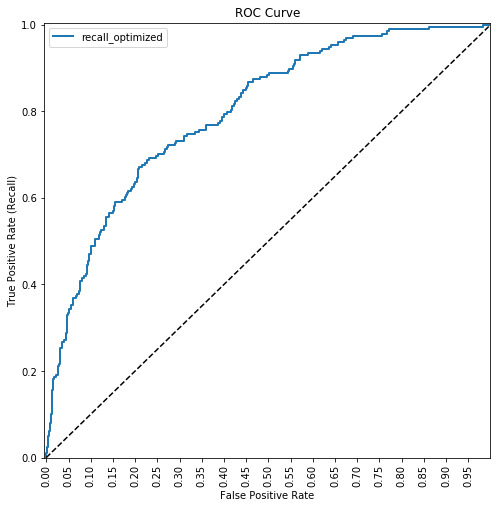

In [35]:
fpr, tpr, auc_thresholds = roc_curve(y_real, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [36]:
y = val_labels[:,1][val_labels[:,1]>0]
yhat = val_outputs[:,1][val_labels[:,1]>0]

In [37]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

1029.8018

In [38]:
y = np.array(Y_val)  #so we can tune the cut point
p = val_outputs[:,0]
f2 = val_outputs[:,1]
yhat = (1-p)*f2

In [39]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

926.0881459024565

In [40]:
print(np.cov(y, p))

[[ 9.70960988e+05 -3.36336963e+01]
 [-3.36336963e+01  3.28673305e-02]]


In [41]:
print(np.cov(f2, p))

[[ 7.01366691e+04 -2.84858710e+01]
 [-2.84858710e+01  3.28673305e-02]]
